#### Imports

In [1]:
import matplotlib.pyplot as plt

#### Facts Base (User Symptoms)

In [2]:
facts = {
    "fever": True,
    "cough": True,
    "fatigue": True,
    "headache": False
}

#### Rule Base (IF–THEN Rules)

In [3]:
rules = [
    {
        "if": ["fever", "cough"],
        "then": "flu"
    },
    {
        "if": ["flu", "fatigue"],
        "then": "viral_infection"
    },
    {
        "if": ["viral_infection"],
        "then": "doctor_consultation_required"
    }
]

#### Forward Chaining Engine

In [4]:
def forward_chaining(facts, rules):
    inferred = set()
    reasoning_log = []

    while True:
        fired = False

        for rule in rules:
            if all(fact in facts and facts[fact] for fact in rule["if"]):
                conclusion = rule["then"]

                if conclusion not in facts:
                    facts[conclusion] = True
                    inferred.add(conclusion)
                    fired = True
                    reasoning_log.append(
                        f"Applied rule: IF {rule['if']} THEN {conclusion}"
                    )

        if not fired:
            break

    return inferred, reasoning_log

#### Run the Expert System

In [5]:
inferred_facts, reasoning_log = forward_chaining(facts, rules)

print("🧾 Inferred Conclusions:")
for fact in inferred_facts:
    print("-", fact)

🧾 Inferred Conclusions:
- doctor_consultation_required
- flu
- viral_infection


#### Display Reasoning Path

In [6]:
print("\n🔍 Reasoning Steps:")
for step in reasoning_log:
    print(step)


🔍 Reasoning Steps:
Applied rule: IF ['fever', 'cough'] THEN flu
Applied rule: IF ['flu', 'fatigue'] THEN viral_infection
Applied rule: IF ['viral_infection'] THEN doctor_consultation_required


#### Simple Inference Flow Visualization

In [8]:
def save_inference_flow(reasoning_log, filename):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis("off")

    y = 0.9
    for step in reasoning_log:
        ax.text(0.05, y, step, fontsize=10)
        y -= 0.15

    ax.set_title("Expert System Inference Flow")
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

#### Generating & Saving Figure

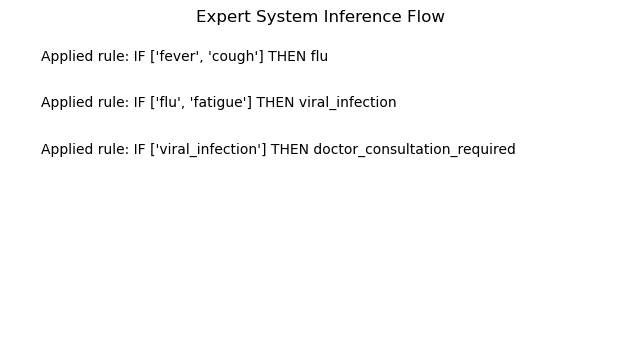

In [9]:
save_inference_flow(
    reasoning_log,
    filename="expert_system_inference_flow.png"
)

#### Final Conclusion Output

In [10]:
if "doctor_consultation_required" in inferred_facts:
    print("\n✅ Final Advice: Doctor consultation is recommended.")
else:
    print("\nℹ️ No serious condition inferred.")


✅ Final Advice: Doctor consultation is recommended.
